<a href="https://colab.research.google.com/github/Shobana0608/Learnbay-Project/blob/main/coupon_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I-Business Understanding:                COUPON RECOMMENDATION SYSTEM

## 1-Overview:

Coupon Recommendation System:
This data was collected via a survey on the Ecom website Mechanical Truck. The survey describes different driving scenarios including the user’s destination, current time, weather, passenger, coupon attributes, user attributes, and contextual attributes, and then asks the user whether he/she will accept the coupon or not.

## 2-Business Objective:

Project Overview:
This project implements a machine learning model to predict coupon acceptance in an in-vehicle recommendation system. Using features such as weather conditions, passenger information, time of day, and user preferences, the model helps businesses optimize their coupon targeting strategies.

## II- Data Understanding:

## 1-Importing Libraries


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



## 2-Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Coupon Recommendation System/DS_DATA.csv')



# Rename a specific column
df.rename(columns={'Accept(Y/N?)': 'Y'}, inplace=True)

# Save the updated DataFrame back to the CSV file
df.to_csv('/content/drive/MyDrive/Coupon Recommendation System/DS_DATA.csv', index=False)

print("Column name updated successfully!")





Column name updated successfully!


## 3-Explanation of Dataset attributes/features:

1. Gender: Female, Male
2. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
3. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
4. has_Children: 1: has children, 0: No children
5. Education: Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School
6. Occupation: Traveller’s occupation
7. Income: income of the traveler
8. Car: Description of vehicle driven by the traveller
9. Bar: how many times does the traveler go to a bar every month? 10. Coffee House: how many times does the user go to a coffeehouse every month?
10. Carry Away: how many times does the user get takeaway food every month?
12. Restaurant20To50: how many times does the user go to a restaurant with an average expense per person of $20 — $50 every month
13. Destination: destination of traveler
14. Passenger: who are the passengers in the car
15. Weather: weather when the user is driving (Sunny, Rainy, Snowy)
16. Temperature: temperature in Fahrenheit when the user is driving
17. Coupon: Type of Coupon
18. Expiration: Validity of Cupon
19. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1):
20. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
21. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
22. direction_same: whether the restaurant/cafe/bar is in the same direction as the traveler’s current destination (0,1)
23. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as the user’s current destination (0,1)
23. Accept(Y/N?)- Target column( whether user will accept the coupon or not?)
1:accepted, 0:rejected


## III. Data Preparation

# 1. OVERVIEW

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

## 2.REMOVE DUPLICATES:

In [6]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(12684, 25)
(12393, 25)


## 3-DEALING WITH MISSING VALUES:

In [7]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [8]:
missing_percentage(df)

,Total,Percent
car,12287,99.14
CoffeeHouse,215,1.73
Restaurant20To50,188,1.52
CarryAway,148,1.19
RestaurantLessThan20,128,1.03
Bar,106,0.86
weather,0,0.00
passanger,0,0.00
destination,0,0.00
maritalStatus,0,0.00


We can see that the total 6 attributes have missing values, from that 'car' feature has 99% of the missing value so we need to drop this feature.
Other features like 'bar', 'coffeehouse', 'carryaway', 'RestaurantLessThan20', and 'Restaurant20To50' have approx 1% of missing value, so we need to fill these missing values with some other value, for that we will use mode imputation.

In [9]:
df.drop(['car'], axis=1, inplace=True)

In [10]:
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)

## 4-Visualization and Feature Relations

4.1-Correlation of Features

In [11]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Numerical Columns: ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [12]:
numeric_categorical_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df[numeric_categorical_features]
df_numeric_categorical.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.016963,NaN,-0.141124,-0.230067,0.088885,-0.088885,0.064074
has_children,-0.016963,1.000000,NaN,0.078686,-0.011651,-0.032276,0.032276,-0.044889
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.141124,0.078686,NaN,1.000000,0.321919,-0.297284,0.297284,-0.086050
toCoupon_GEQ25min,-0.230067,-0.011651,NaN,0.321919,1.000000,-0.190759,0.190759,-0.107855
direction_same,0.088885,-0.032276,NaN,-0.297284,-0.190759,1.000000,-1.000000,0.016356
direction_opp,-0.088885,0.032276,NaN,0.297284,0.190759,-1.000000,1.000000,-0.016356
Y,0.064074,-0.044889,NaN,-0.086050,-0.107855,0.016356,-0.016356,1.000000


1-Feature 'direction_same' is perfectly correlated with 'direction_opp', both have the same variance.

2-'toCoupon_GEQ5min' feature has no correlation with any feature because it has the same value '1' for all data points, which means all the restaurants/bars are at least more than five minutes away from the driver.

so, drop both 'direction_opp' and 'toCoupon_GEQ5min' features.

In [13]:
df.drop(['direction_opp','toCoupon_GEQ5min'], axis=1, inplace=True)

## 4.2-Univariate Analysis

# A-For direction_same

In [14]:
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

In [15]:
def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()

    return df_EDA

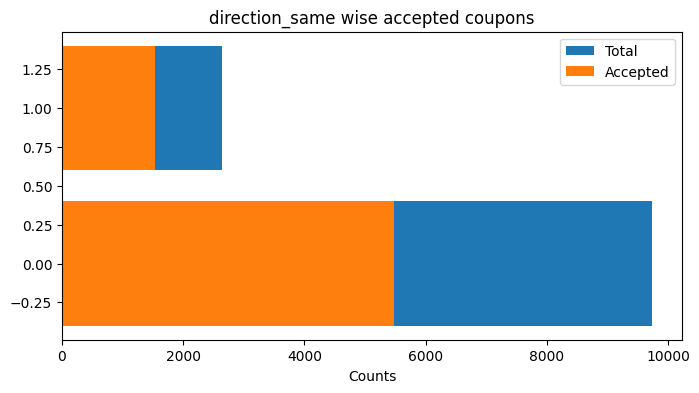

,direction_same,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,0,9744,78.625,5472,4272,56.158,43.842
1,1,2649,21.375,1540,1109,58.135,41.865


In [16]:
univariate_analysis(df,'direction_same')

Observations:

direction_same feature has 78% value is '0', and 21% value is '1'. Both value has almost similar acceptance ratio. so this feature not more usefull. So, we drop 'direction_same' feature.

In [17]:
df.drop(['direction_same'], axis=1, inplace=True)

# B-For coupon





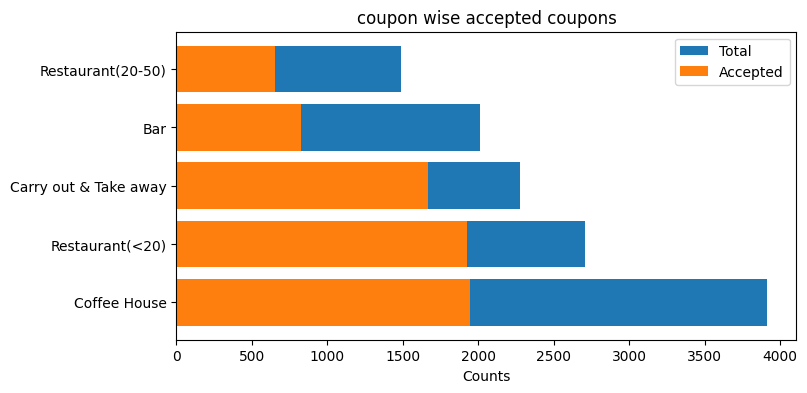

,coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Coffee House,3913,31.574,1943,1970,49.655,50.345
4,Restaurant(<20),2708,21.851,1924,784,71.049,28.951
1,Carry out & Take away,2275,18.357,1665,610,73.187,26.813
0,Bar,2010,16.219,824,1186,40.995,59.005
3,Restaurant(20-50),1487,11.999,656,831,44.116,55.884


In [18]:
univariate_analysis(df,'coupon')

Observations:

Maximum coupons offered are for Coffee House coupons.
Maximum coupons accepted by users are Carry out & Take away and Restaurant(<20) coupons.
Bar coupon has a very low acceptance ratio.

## C-For age

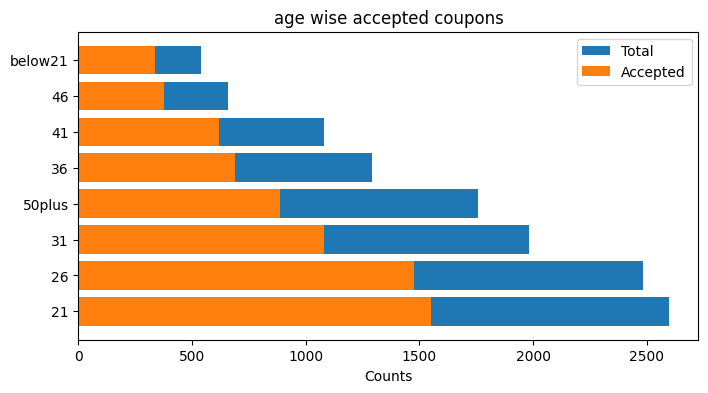

,age,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,21,2598,20.963,1549,1049,59.623,40.377
1,26,2486,20.060,1475,1011,59.332,40.668
2,31,1984,16.009,1079,905,54.385,45.615
6,50plus,1756,14.169,888,868,50.569,49.431
3,36,1293,10.433,687,606,53.132,46.868
4,41,1079,8.707,618,461,57.275,42.725
5,46,660,5.326,378,282,57.273,42.727
7,below21,537,4.333,338,199,62.942,37.058


In [19]:
univariate_analysis(df,'age')

Observations:

Most users in this data have ages between 21 to 26 years.
The users whose age is below 21 years have the highest coupon acceptance ratio.
The users whose age is above 50 years have the highest coupon rejection ratio.

## D- For education

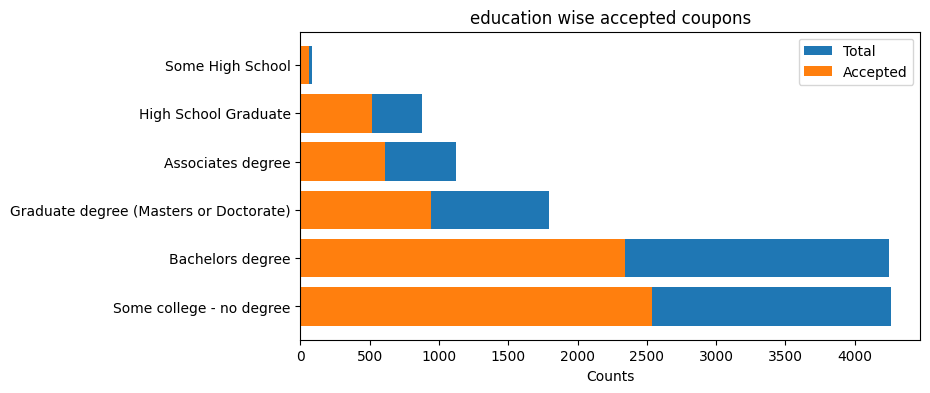

,education,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
5,Some college - no degree,4260,34.374,2534,1726,59.484,40.516
1,Bachelors degree,4247,34.269,2344,1903,55.192,44.808
2,Graduate degree (Masters or Doctorate),1793,14.468,939,854,52.370,47.630
0,Associates degree,1126,9.086,614,512,54.529,45.471
3,High School Graduate,880,7.101,519,361,58.977,41.023
4,Some High School,87,0.702,62,25,71.264,28.736


In [20]:
univariate_analysis(df,'education')

Observations:

Most users have at least a Bachelor's degree or Some college - no degree.
In this data, very few users have only Some High School education, and those users have the highest coupon acceptance ratio.
Users who have a Graduate degree (Masters or Doctorate) have the least coupon acceptance ratio.

## E- For income

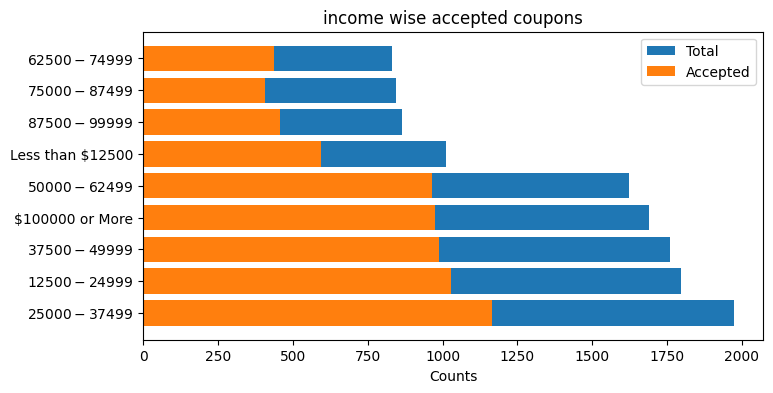

,income,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,$25000 - $37499,1972,15.912,1165,807,59.077,40.923
1,$12500 - $24999,1795,14.484,1029,766,57.326,42.674
3,$37500 - $49999,1760,14.202,987,773,56.080,43.920
0,$100000 or More,1688,13.621,974,714,57.701,42.299
4,$50000 - $62499,1624,13.104,964,660,59.360,40.640
8,Less than $12500,1013,8.174,593,420,58.539,41.461
7,$87500 - $99999,865,6.980,456,409,52.717,47.283
6,$75000 - $87499,844,6.810,407,437,48.223,51.777
5,$62500 - $74999,832,6.713,437,395,52.524,47.476


In [21]:
univariate_analysis(df,'income')

Observations:

Most users in this data have income in between \$12500 and \$49999
Users who have low income and high income accept more coupons than others.
Users who have medium-range income are mostly rejecting the coupon.

## F- For destination

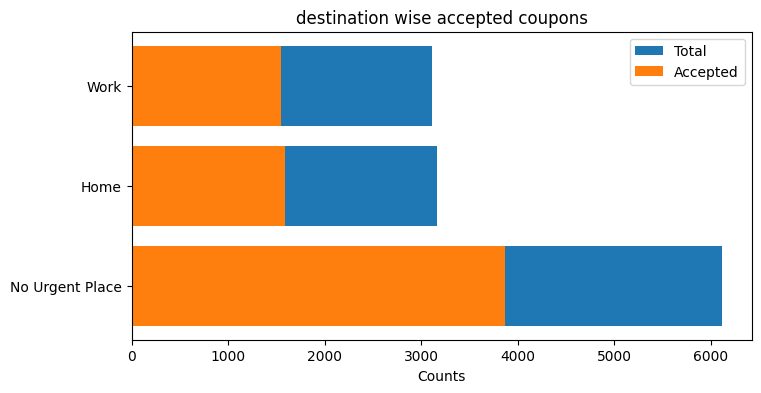

,destination,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,6118,49.367,3865,2253,63.174,36.826
0,Home,3161,25.506,1594,1567,50.427,49.573
2,Work,3114,25.127,1553,1561,49.872,50.128


In [22]:
univariate_analysis(df,'destination')

Observations:

Most of the users go to No Urgent Place.
The users who have destination No Urgent Place are accepting more coupons than others.
The users who have destination Home and Work have almost similar coupon acceptance ratios.

## G- For passanger

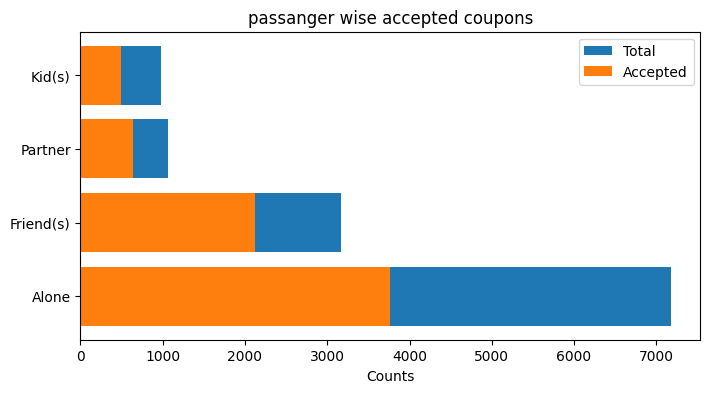

,passanger,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,Alone,7178,57.920,3760,3418,52.382,47.618
1,Friend(s),3166,25.547,2127,1039,67.183,32.817
3,Partner,1068,8.618,634,434,59.363,40.637
2,Kid(s),981,7.916,491,490,50.051,49.949


In [23]:
univariate_analysis(df,'passanger')

Observations:

Most of the time users go out Alone.
The users who go out with Friends or Partner have more coupon acceptance ratios than Alone users.
The users who go out with Friends are accepting more coupons than other co-passengers.

## H-For weather

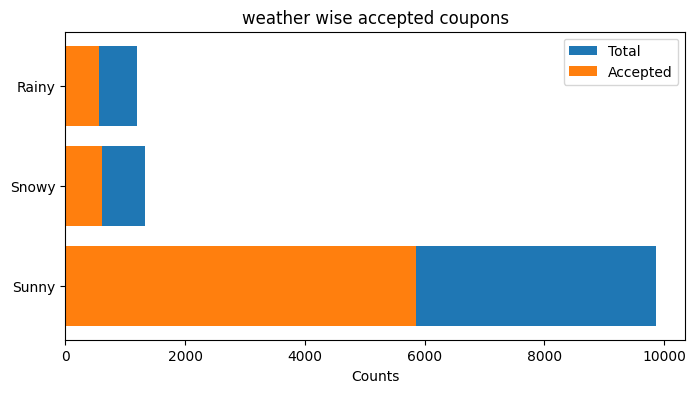

,weather,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Sunny,9862,79.577,5850,4012,59.319,40.681
1,Snowy,1329,10.724,605,724,45.523,54.477
0,Rainy,1202,9.699,557,645,46.339,53.661


In [24]:
univariate_analysis(df,'weather')

Observations:

In Sunny weather, users go out more and accept more coupons than other wethers.

I- temperature

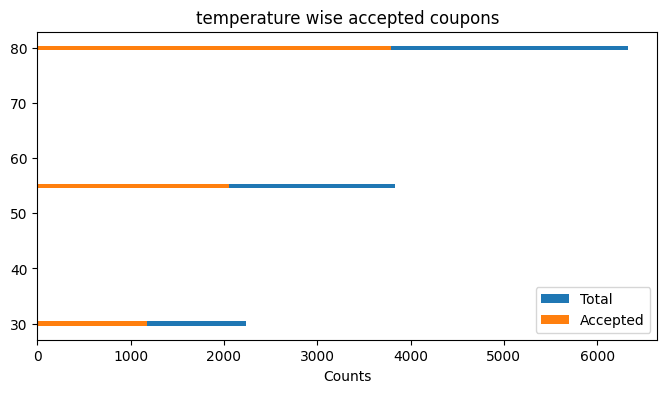

,temperature,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,80,6328,51.061,3786,2542,59.829,40.171
1,55,3828,30.888,2055,1773,53.683,46.317
0,30,2237,18.051,1171,1066,52.347,47.653


In [25]:
univariate_analysis(df,'temperature')

Observations:

Most of the time users go out when the temperature is 80 F.
When the temperature is 80 F, user's coupon acceptance ratio is approx 59.86%.rs.

## ##J-For Gender

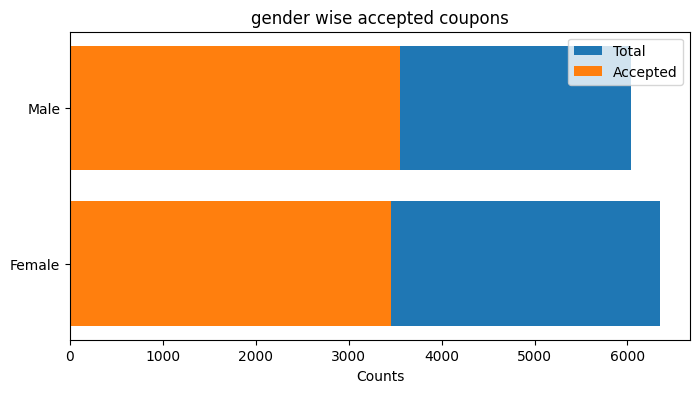

,gender,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,Female,6355,51.279,3460,2895,54.445,45.555
1,Male,6038,48.721,3552,2486,58.827,41.173


In [26]:
univariate_analysis(df,'gender')

Observations:

Male and Female both have almost similar coupon acceptance ratios.

## K- For maritalStatus

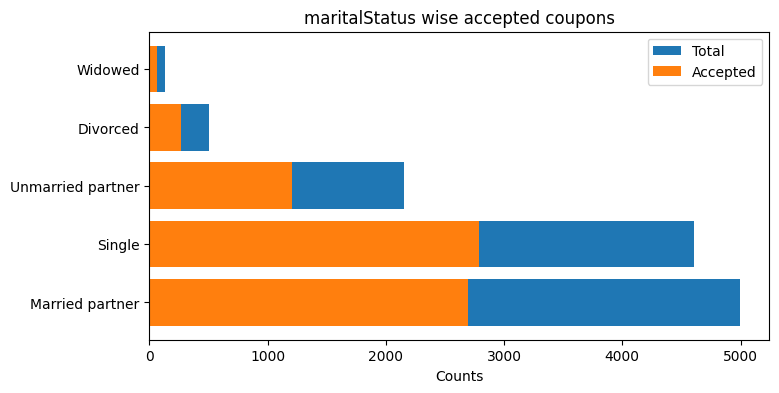

,maritalStatus,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
1,Married partner,4994,40.297,2697,2297,54.005,45.995
2,Single,4610,37.198,2784,1826,60.390,39.610
3,Unmarried partner,2155,17.389,1203,952,55.824,44.176
0,Divorced,505,4.075,266,239,52.673,47.327
4,Widowed,129,1.041,62,67,48.062,51.938


In [27]:
univariate_analysis(df,'maritalStatus')

Observations:

Most users in this data are Single or have Married partner.
Single users accept more coupons than others.

4.3-Bivariate Analysis¶
Q - What time do users go to Work, Home, or No Urgent Place, and with whom?

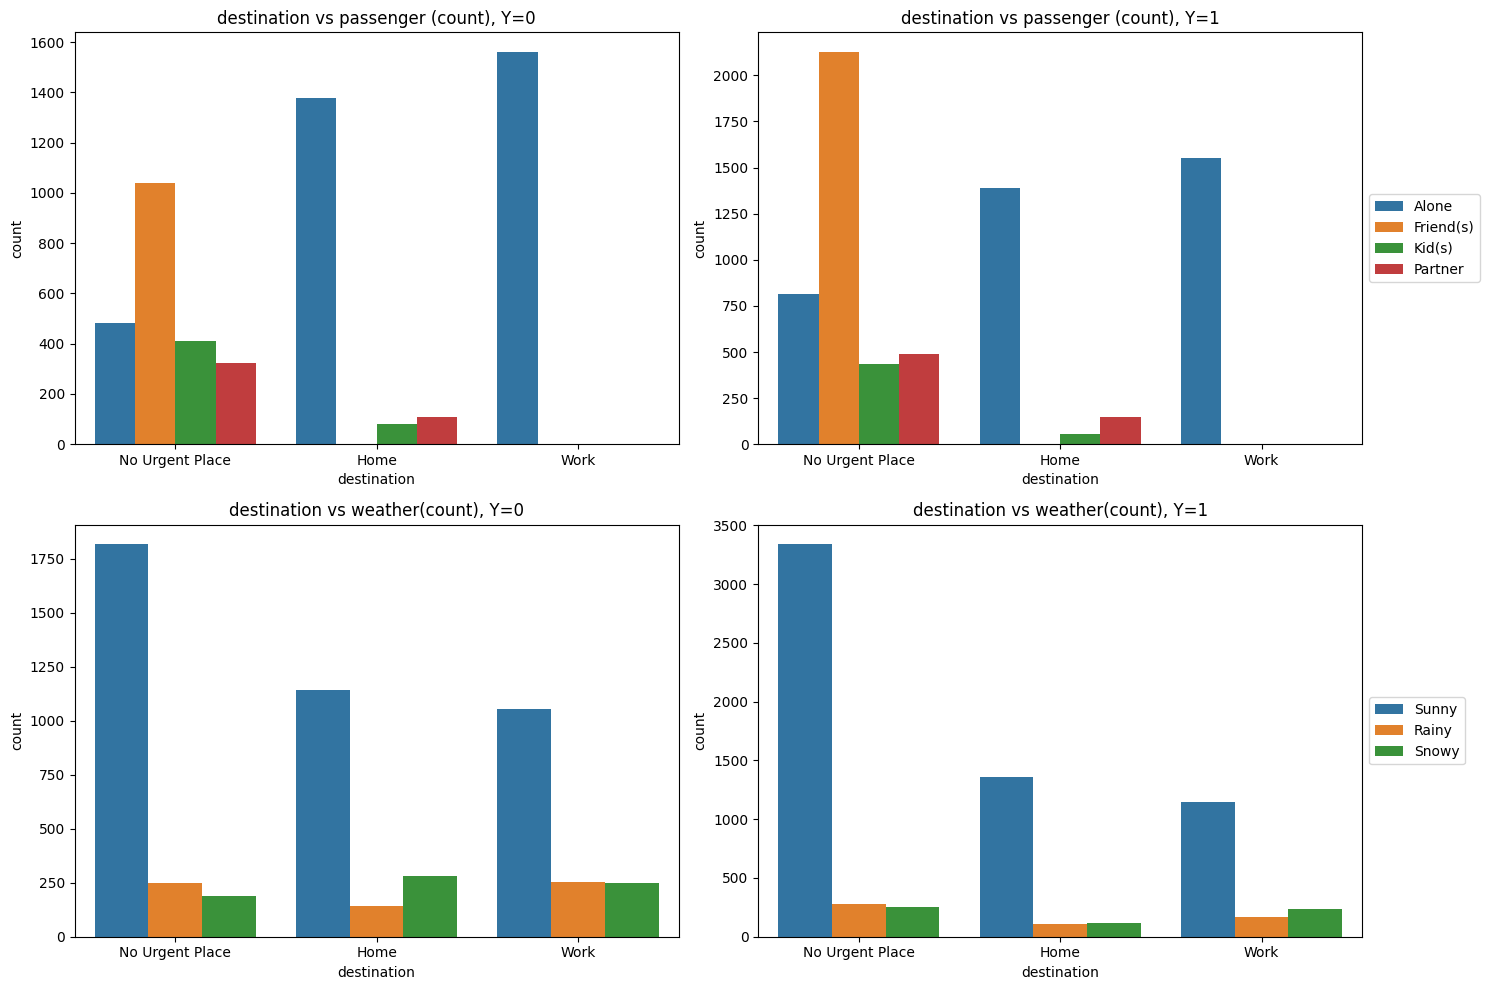

In [28]:
# Define the order of unique values for each variable
destination_order = df['destination'].unique()
passenger_order = df['passanger'].unique()
weather_order = df['weather'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 0], ax=axes[0, 0], order=destination_order, hue_order=passenger_order)
axes[0, 0].set_title('destination vs passenger (count), Y=0')
axes[0, 0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='destination', hue='passanger', data=df[df['Y'] == 1], ax=axes[0, 1], order=destination_order, hue_order=passenger_order)
axes[0, 1].set_title('destination vs passenger (count), Y=1')

# Set legend on the right
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for 'destination' vs 'weather', Y=0
sns.countplot(x='destination', hue='weather', data=df[df['Y'] == 0], ax=axes[1, 0], order=destination_order, hue_order=weather_order)
axes[1, 0].set_title('destination vs weather(count), Y=0')
axes[1, 0].legend().remove()


# Plot for 'destination' vs 'weather', Y=1
sns.countplot(x='destination', hue='weather', data=df[df['Y'] == 1], ax=axes[1, 1], order=destination_order, hue_order=weather_order)
axes[1, 1].set_title('destination vs weather(count), Y=1')

# Set legend on the right
axes[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

Observations:

The users who go with Friends have only No Urgent Place destination.
Maximum users accept coupons when the climate is 'sunny'
very minimum users accepted tokens when the weather is 'rainy' and 'snowy' with home and work destinations.

# Perform Correlation Analysis between numerical features and the target variable (Y)

Correlation with Target Variable (Y):
temperature          0.064074
has_children        -0.044889
toCoupon_GEQ15min   -0.086050
toCoupon_GEQ25min   -0.107855
Name: Y, dtype: float64


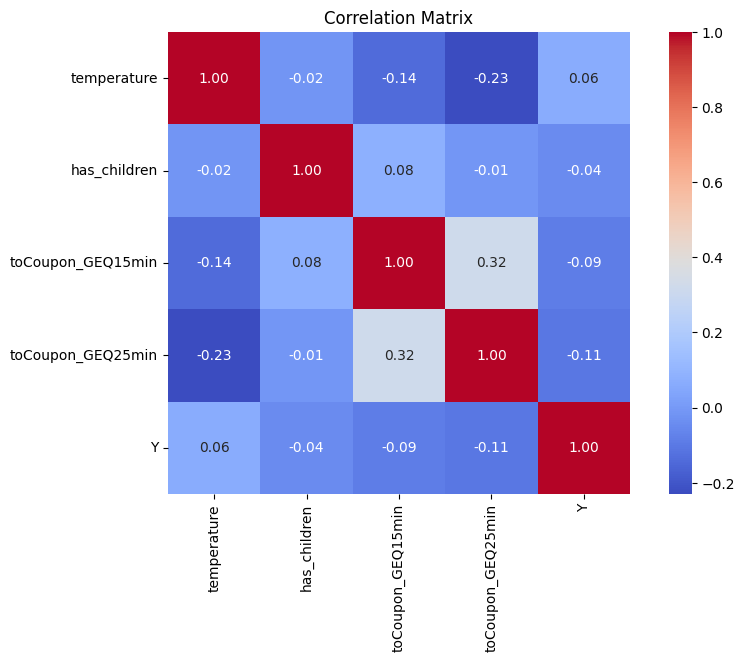

In [29]:
# Columns for correlation analysis
numerical_columns = ['temperature', 'has_children',
                     'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
                  'Y']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Extract the correlation with the target variable Y
correlation_with_target = correlation_matrix['Y'].drop('Y')

# Print the correlation with target variable (Y)
print("Correlation with Target Variable (Y):")
print(correlation_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Visualize distributions of key numerical features (e.g., temperature, toCoupon_GEQXmin) and their impact on coupon acceptance

Correlation with Target Variable (Y):
temperature          0.064074
has_children        -0.044889
toCoupon_GEQ15min   -0.086050
toCoupon_GEQ25min   -0.107855
Name: Y, dtype: float64


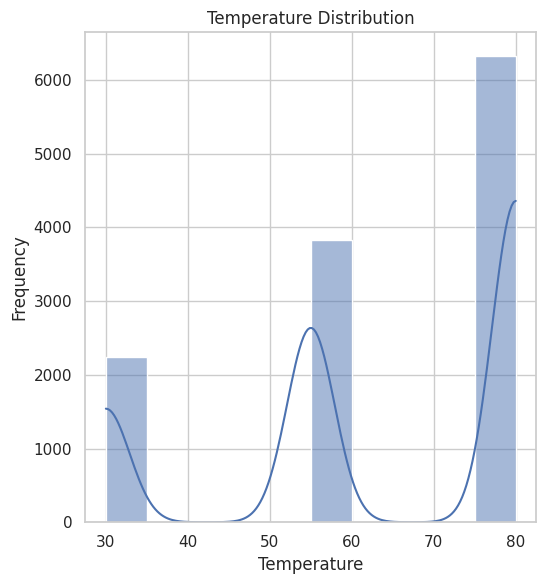

In [33]:
correlation_matrix = df[['temperature', 'has_children',
                            'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
                            'Y']].corr()

correlation_with_target = correlation_matrix['Y'].drop('Y')
print("Correlation with Target Variable (Y):")
print(correlation_with_target)

# Visualize distributions of key numerical features
sns.set(style='whitegrid')

# Create a figure to hold multiple plots
plt.figure(figsize=(15, 6))

# Temperature Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
# Show plots
plt.tight_layout()
plt.show()


Week 3: Machine Learning Models
A. Split the data into training and test sets (80% training, 20% testing)

In [30]:
print(df.columns.tolist())

['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Y']


In [56]:
# Prepare features and target variable
X = df.drop('Y', axis=1)
y = df['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (9914, 20)
Test set shape: (2479, 20)


B. Implement and evaluate different machine learning models:

In [55]:

# Initialize the models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

Logistic Regression: A basic linear model to predict coupon acceptance

In [60]:
# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the train and test data, filling any missing columns with 0
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Fit the logistic regression model
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

C. Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

In [61]:

# Print metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(f"Precision: {precision_score(y_test, y_pred_logistic)}")
print(f"Recall: {recall_score(y_test, y_pred_logistic)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logistic)}")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Metrics:
Accuracy: 0.681726502622025
Precision: 0.6883116883116883
Recall: 0.7742878013148283
F1 Score: 0.7287727741491922
              precision    recall  f1-score   support

           0       0.67      0.57      0.61      1110
           1       0.69      0.77      0.73      1369

    accuracy                           0.68      2479
   macro avg       0.68      0.67      0.67      2479
weighted avg       0.68      0.68      0.68      2479



DecisionTreeClassifier: A tree-based model for classification.

In [62]:

# Decision Tree Classifier
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [63]:

print("\nDecision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_tree)}")
print(f"Recall: {recall_score(y_test, y_pred_tree)}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree)}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classifier Metrics:
Accuracy: 0.6700282371924163
Precision: 0.7018315018315018
Recall: 0.6997808619430241
F1 Score: 0.7008046817849305
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1110
           1       0.70      0.70      0.70      1369

    accuracy                           0.67      2479
   macro avg       0.67      0.67      0.67      2479
weighted avg       0.67      0.67      0.67      2479



RandomForestClassifier: An ensemble modelthat builds multiple decision trees to improve accuracy

In [44]:

# Random Forest Classifier
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)


Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

In [64]:
print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest)}")
print(f"Precision: {precision_score(y_test, y_pred_forest)}")
print(f"Recall: {recall_score(y_test, y_pred_forest)}")
print(f"F1 Score: {f1_score(y_test, y_pred_forest)}")
print(classification_report(y_test, y_pred_forest))


Random Forest Classifier Metrics:
Accuracy: 0.745461879790238
Precision: 0.7463284379172229
Recall: 0.816654492330168
F1 Score: 0.7799093128705964
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1110
           1       0.75      0.82      0.78      1369

    accuracy                           0.75      2479
   macro avg       0.75      0.74      0.74      2479
weighted avg       0.75      0.75      0.74      2479



In [ ]:
evaluate_classification(y_pred_knn, y_test)

Visualize Model Performance across Metrics

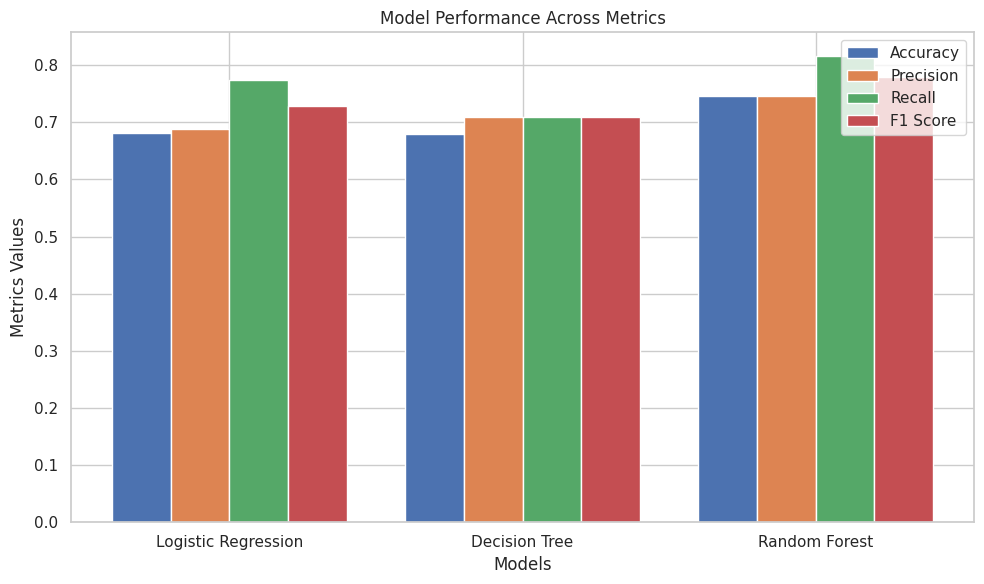

In [67]:
# Data for the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.681726, 0.678902, 0.7454618]
precision = [0.688311, 0.709583, 0.7463284]
recall = [0.774287, 0.708546, 0.816654]
f1_score = [0.728772,0.709064, 0.779909]

# Set the position of the bars on the x-axis
x = np.arange(len(models))

# Bar width
width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bars
bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Labeling the plot
ax.set_xlabel('Models')
ax.set_ylabel('Metrics Values')
ax.set_title('Model Performance Across Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

D. Compare models to determine which one performs best for predicting coupon acceptance.

In [68]:
model_metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [0.6858494284588096, 0.6897910918407568, 0.7418210484824596],
    "Precision": [0.6934260429835651, 0.7199434229137199, 0.7404336734693877],
    "Recall": [0.7785663591199432, 0.7224982256919801, 0.8239886444286728],
    "F1 Score": [0.7335339351387495, 0.7212185618136734, 0.7799798454820289]
}

# Create a DataFrame to store the metrics
performance_df = pd.DataFrame(model_metrics)

# View each model's performance
print("Model Performance Comparison:")
print(performance_df)

# Find the best model for each metric
best_f1 = performance_df.loc[performance_df['F1 Score'].idxmax()]
best_recall = performance_df.loc[performance_df['Recall'].idxmax()]
best_precision = performance_df.loc[performance_df['Precision'].idxmax()]
best_accuracy = performance_df.loc[performance_df['Accuracy'].idxmax()]

# View the best models based on different metrics
print("\nBest Model Based on F1 Score:")
print(best_f1)

print("\nBest Model Based on Recall:")
print(best_recall)

print("\nBest Model Based on Precision:")
print(best_precision)

print("\nBest Model Based on Accuracy:")
print(best_accuracy)

# Check if the best models are indeed different
if best_f1.equals(best_recall) and best_recall.equals(best_precision) and best_precision.equals(best_accuracy):
    print("\nAll metrics point to the same best model.")
else:
    print("\nDifferent models may be the best for different metrics.")

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.685849   0.693426  0.778566  0.733534
1        Decision Tree  0.689791   0.719943  0.722498  0.721219
2        Random Forest  0.741821   0.740434  0.823989  0.779980

Best Model Based on F1 Score:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score           0.77998
Name: 2, dtype: object

Best Model Based on Recall:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score           0.77998
Name: 2, dtype: object

Best Model Based on Precision:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score           0.77998
Name: 2, dtype: object

Best Model Based on Accuracy:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score 

Week 4: Fine-Tuning and Reporting
A. Fine-tune the best-performing model (Random Forest Model) using GridSearchCV to search for optimal hyperparameters (e.g., number of trees, max depth, minimum samples per split, etc.)

In [69]:
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid: Numer of trees, Maximum depth of the tree, Minimum samples required to split an internal node, and Minimum samples required to be at a leaf node
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# View the best hyperparameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


B. Evaluate the Tuned Model on the Test Data and Compare Its Performance with previous models

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict using the best model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# View performance metrics for the tuned model
print("Best Random Forest Model Performance (After Tuning):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Best Random Forest Model Performance (After Tuning):
Accuracy: 0.7349737797498992
Precision: 0.7299741602067183
Recall: 0.8254200146092038
F1 Score: 0.7747685978745287
